# Загрузка и обработка базы данных для дальнейшего анализа

In [1]:
# Загрузка и обработка базы данных для дальнейшего анализа

from pandas import read_csv
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler
Base = read_csv("Dougherty_data_18.csv",  header=0, sep=';',  decimal=',', na_values='?')
Base.head()

,ASVAB01,ASVAB02,ASVAB03,ASVAB04,ASVAB05,ASVAB06,ASVABC,HEIGHT,WEIGHT85,WEIGHT02,...,EDUCHSD,EDUCDO,SINGLE,MARRIED,DIVORCED,FAITHN,FAITHP,FAITHC,FAITHJ,FAITHO
0,25,34,31,22,26,34,30.25,70.0,145,204,...,1,0,0,1,0,0,0,0,0,1
1,56,43,48,47,52,59,45.25,71.0,136,178,...,1,0,1,0,0,0,0,1,0,0
2,53,49,49,51,38,42,49.50,70.0,169,196,...,1,0,0,1,0,0,1,0,0,0
3,57,37,43,39,34,30,39.00,70.0,166,182,...,1,0,0,1,0,0,1,0,0,0
4,57,51,59,53,41,45,53.50,70.0,175,222,...,1,0,0,1,0,0,0,1,0,0


In [2]:
Base = Base.fillna(Base.median(axis=0), axis=0)
Base.head()

,ASVAB01,ASVAB02,ASVAB03,ASVAB04,ASVAB05,ASVAB06,ASVABC,HEIGHT,WEIGHT85,WEIGHT02,...,EDUCHSD,EDUCDO,SINGLE,MARRIED,DIVORCED,FAITHN,FAITHP,FAITHC,FAITHJ,FAITHO
0,25,34,31,22,26,34,30.25,70.0,145,204,...,1,0,0,1,0,0,0,0,0,1
1,56,43,48,47,52,59,45.25,71.0,136,178,...,1,0,1,0,0,0,0,1,0,0
2,53,49,49,51,38,42,49.50,70.0,169,196,...,1,0,0,1,0,0,1,0,0,0
3,57,37,43,39,34,30,39.00,70.0,166,182,...,1,0,0,1,0,0,1,0,0,0
4,57,51,59,53,41,45,53.50,70.0,175,222,...,1,0,0,1,0,0,0,1,0,0


# Построение линейных регрессий

In [3]:
%matplotlib inline
from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns
from __future__ import print_function
from statsmodels.compat import lzip
import statsmodels
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt

lm1 = smf.ols('EARNINGS ~ S + HEIGHT + MALE + W_EXP', data=Base).fit()

print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:               EARNINGS   R-squared:                       0.241
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     42.43
Date:                Sun, 23 Dec 2018   Prob (F-statistic):           6.43e-31
Time:                        16:46:07   Log-Likelihood:                -2137.8
No. Observations:                 540   AIC:                             4286.
Df Residuals:                     535   BIC:                             4307.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -32.2684     12.826     -2.516      0.0

In [4]:
lm2 = smf.ols('EARNINGS ~ S + MALE + W_EXP', data=Base).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:               EARNINGS   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     56.55
Date:                Sun, 23 Dec 2018   Prob (F-statistic):           9.05e-32
Time:                        16:46:10   Log-Likelihood:                -2137.9
No. Observations:                 540   AIC:                             4284.
Df Residuals:                     536   BIC:                             4301.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -25.7314      4.379     -5.876      0.0

In [5]:
lm3 = smf.ols('EARNINGS ~ HEIGHT + MALE', data=Base).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:               EARNINGS   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     17.94
Date:                Sun, 23 Dec 2018   Prob (F-statistic):           2.88e-08
Time:                        16:46:13   Log-Likelihood:                -2194.7
No. Observations:                 540   AIC:                             4395.
Df Residuals:                     537   BIC:                             4408.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.0824     13.780     -0.224      0.8

In [6]:
lm4 = smf.ols("EARNINGS ~ S + W_EXP", data=Base).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:               EARNINGS   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     65.00
Date:                Sun, 23 Dec 2018   Prob (F-statistic):           5.26e-26
Time:                        16:46:15   Log-Likelihood:                -2153.6
No. Observations:                 540   AIC:                             4313.
Df Residuals:                     537   BIC:                             4326.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -25.8913      4.504     -5.749      0.0

# Перекодирование интервальной переменной в дихотомическую

In [8]:
Base["EARNdich"] = 0
for i in range(len(Base["EARNdich"])):
    if (Base["EARNINGS"])[i] > np.median(Base["EARNINGS"]):
        (Base["EARNdich"])[i] = 1
    else:
        (Base["EARNdich"])[i] = 0
Base[["EARNdich", "EARNINGS"]].head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,EARNdich,EARNINGS
0,0,9.10
1,0,10.00
2,1,20.60
3,0,9.97
4,0,12.40


In [9]:
np.median(Base["EARNINGS"])

16.005000000000003

# Логистические регрессии

In [10]:
from sklearn import datasets
from distutils.version import LooseVersion

X = np.array(Base[["S", 'W_EXP']])
Y = np.array(Base["EARNdich"])

print('Class labels:', np.unique(Y))

Class labels: [0 1]


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.3, random_state=1, stratify=Y)

In [12]:
print('Labels counts in y:', np.bincount(Y))
print('Labels counts in y_train:', np.bincount(Y_train))
print('Labels counts in y_test:', np.bincount(Y_test))

Labels counts in y: [273 267]
Labels counts in y_train: [191 187]
Labels counts in y_test: [82 80]


In [13]:
# Стандартизирование независимых переменных

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
Y_combined = np.hstack((Y_train, Y_test))

In [14]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    
    if test_idx:
        
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

In [15]:
class LogisticRegressionGD(object):
  
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
    
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            
           
            cost = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output)))
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
  
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, z):
        
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        
        return np.where(self.net_input(X) >= 0.0, 1, 0)

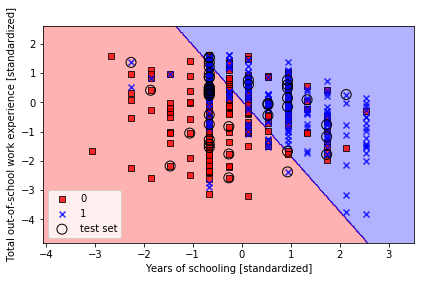

In [16]:
# Построение модели логистической переменной

from sklearn.linear_model import LogisticRegression


lr = LogisticRegression(C=100.0, random_state=1)
lr.fit(X_train_std, Y_train)

plot_decision_regions(X_combined_std, Y_combined,
                      classifier=lr, test_idx=range(105, 150))
plt.xlabel('Years of schooling [standardized]')
plt.ylabel('Total out-of-school work experience [standardized]')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [17]:
lr.coef_

array([[1.08550588, 0.5740273 ]])

In [18]:
lr.predict_proba(X_test_std[:10, :])

array([[0.34298689, 0.65701311],
       [0.88269853, 0.11730147],
       [0.5304203 , 0.4695797 ],
       [0.37503473, 0.62496527],
       [0.32737603, 0.67262397],
       [0.9025576 , 0.0974424 ],
       [0.98676816, 0.01323184],
       [0.49764575, 0.50235425],
       [0.47389067, 0.52610933],
       [0.80575461, 0.19424539]])

# Дерево классификации

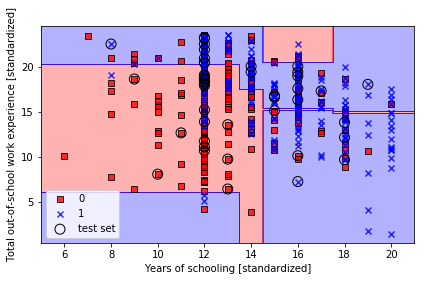

In [19]:
# Построение стандартной модели дерева классификации

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='gini', 
                              max_depth=4, 
                              random_state=1)
tree.fit(X_train, Y_train)

X_combined = np.vstack((X_train, X_test))
Y_combined = np.hstack((Y_train, Y_test))
plot_decision_regions(X_combined, Y_combined, 
                      classifier=tree, test_idx=range(105, 150))

plt.xlabel('Years of schooling [standardized]')
plt.ylabel('Total out-of-school work experience [standardized]')
plt.legend(loc='lower left')
plt.tight_layout()

plt.show()

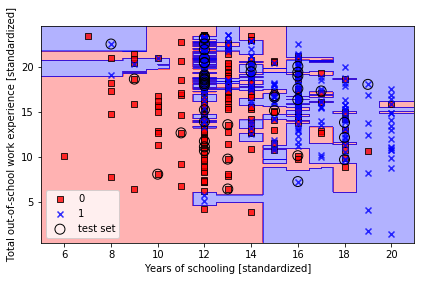

In [21]:
# Построение модели дерева классификации "случайный лес"

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='gini',
                                n_estimators=1000, 
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, Y_train)

plot_decision_regions(X_combined, Y_combined, 
                      classifier=forest, test_idx=range(105, 150))

plt.xlabel('Years of schooling [standardized]')
plt.ylabel('Total out-of-school work experience [standardized]')
plt.legend(loc='lower left')
plt.tight_layout()

plt.show()

# Построение ROC-кривых (Receiver Operating Characteristic)

<Figure size 432x288 with 0 Axes>

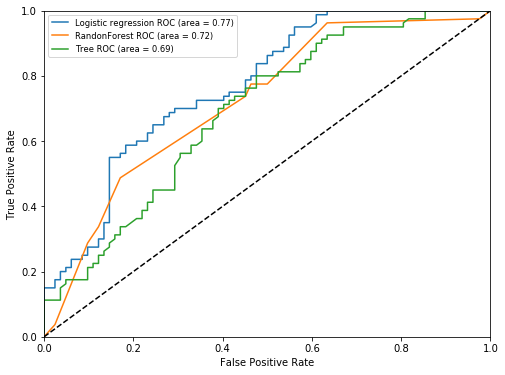

In [299]:
# Построение ROC-кривых построенных моделей на одной плоскостий

import pylab as pl
pl.clf()
plt.figure(figsize=(8,6))

lr.probability = True
probas = lr.fit(X_train, Y_train).predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(Y_test, probas[:, 1])
roc_auc  = auc(fpr, tpr)
pl.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('Logistic regression', roc_auc))

probas = tree.fit(X_train, Y_train).predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(Y_test, probas[:, 1])
roc_auc  = auc(fpr, tpr)
pl.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('RandonForest',roc_auc))

probas = forest.fit(X_train, Y_train).predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(Y_test, probas[:, 1])
roc_auc  = auc(fpr, tpr)
pl.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('Tree',roc_auc))
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.legend(loc=0, fontsize='small')
pl.show()

# Построение прогноза на тестовой выборке

In [22]:
# В качестве своего тестового набора для построения прогноза будет использоваться база данных другого варианта.
# В качестве тестового варианта будет использоваться база Dougherty_data_1.csv.

# Прогнозирование модели логистической регрессии
Base2 = read_csv('Dougherty_data_1.csv', header=0, sep=';', decimal=',')
Base2 = Base2.fillna(Base.median(axis=0), axis=0)

test = np.array(Base2[["S", 'W_EXP']])

lr.fit(X, Y)
result_new=lr.predict(test)
print(result_new)

[0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0
 0 1 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1
 1 0 0 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1 0 1 1 1 0 1 0 0 0
 0 1 0 0 0 1 1 1 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1 1 0 1 1
 1 0 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0
 0 0 1 1 1 1 0 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 0 0 0 0 1 1 0 0 1
 1 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1
 0 1 1 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1
 0 0 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1 1 1 0 1 0
 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1
 0 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 1 0 1 1 0 0 0
 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 1
 0 0 1 1 0 1 1 1 0 0 0 0 